## Applying Advanced Transformations Core

#### Task

I. Clean the files and combine them into one final DataFrame.

II. Use your combined DataFrame to answer the following questions.

Compare the average weight of super powers who have Super Speed to those who do not.
What is the average height of heroes for each publisher?

#### Imports

In [1]:
## Standard Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
## Importing the OS and JSON Modules
import os,json

In [2]:
# Loading in the csv's
info_df = pd.read_csv('Data/superhero_info - superhero_info.csv')
powers_df = pd.read_csv('Data/superhero_powers - superhero_powers.csv')

#### Cleaning info_df

In [3]:
# Looking at info_df
info_df.head(3)

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}"
2,Abin Sur|DC Comics,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}"


In [4]:
# Replace single quotes with double quotes in the "Measurements" column
info_df['Measurements'] = info_df['Measurements'].str.replace("'", '"')

# Parse the JSON strings in the "Measurements" column
info_df['Measurements'] = info_df['Measurements'].apply(json.loads)

In [5]:
# Extract and clean the "Height" and "Weight" columns
info_df['Height'] = info_df['Measurements'].apply(lambda x: float(x['Height'].replace(' cm', '')))
info_df['Weight'] = info_df['Measurements'].apply(lambda x: float(x['Weight'].replace(' kg', '')))

# Drop the original "Measurements" column if no longer needed
info_df = info_df.drop(columns=['Measurements'])

In [6]:
# Checking for Height and Weight columns
info_df.head(3)

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Height,Weight
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,203.0,441.0
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,191.0,65.0
2,Abin Sur|DC Comics,Male,Ungaran,good,No Hair,blue,red,185.0,90.0


In [7]:
# Split the 'Hero|Publisher' column into 'Hero' and 'Publisher' columns
info_df[['Hero', 'Publisher']] = info_df['Hero|Publisher'].str.split('|', expand=True)

# Drop the original 'Hero|Publisher' column if no longer needed
info_df = info_df.drop(columns=['Hero|Publisher'])

# Checking the Hero and Publisher columns
info_df.head(3)

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Height,Weight,Hero,Publisher
0,Male,Human,good,No Hair,yellow,Unknown,203.0,441.0,A-Bomb,Marvel Comics
1,Male,Icthyo Sapien,good,No Hair,blue,blue,191.0,65.0,Abe Sapien,Dark Horse Comics
2,Male,Ungaran,good,No Hair,blue,red,185.0,90.0,Abin Sur,DC Comics


#### Cleaning powers_df

In [8]:
powers_df.head(4)

,hero_names,Powers
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super..."
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du..."
3,Abin Sur,Lantern Power Ring


In [9]:
# Splitting the Powers at each comma
powers_df['Powers'] = powers_df['Powers'].str.split(',')

In [10]:
# Exploding the column of lists
exploded = powers_df.explode('Powers')
exploded.head()

,hero_names,Powers
0,3-D Man,Agility
0,3-D Man,Super Strength
0,3-D Man,Stamina
0,3-D Man,Super Speed
1,A-Bomb,Accelerated Healing


In [11]:
# Saving the unique values from the exploded column
cols_to_make = exploded['Powers'].dropna().unique()
cols_to_make

array(['Agility', 'Super Strength', 'Stamina', 'Super Speed',
       'Accelerated Healing', 'Durability', 'Longevity', 'Camouflage',
       'Self-Sustenance', 'Cold Resistance', 'Underwater breathing',
       'Marksmanship', 'Weapons Master', 'Intelligence', 'Telepathy',
       'Immortality', 'Reflexes', 'Enhanced Sight', 'Sub-Mariner',
       'Lantern Power Ring', 'Invulnerability', 'Animation',
       'Super Breath', 'Dimensional Awareness', 'Flight', 'Size Changing',
       'Teleportation', 'Magic', 'Dimensional Travel',
       'Molecular Manipulation', 'Energy Manipulation', 'Power Cosmic',
       'Energy Absorption', 'Elemental Transmogrification',
       'Fire Resistance', 'Natural Armor', 'Heat Resistance',
       'Matter Absorption', 'Regeneration', 'Stealth', 'Power Suit',
       'Energy Blasts', 'Energy Beams', 'Heat Generation', 'Danger Sense',
       'Phasing', 'Force Fields', 'Hypnokinesis', 'Invisibility',
       'Enhanced Senses', 'Jump', 'Shapeshifting', 'Elasticity',
 

In [12]:
# Using a for loop and str.contains to create the new columns
for col in cols_to_make:
    powers_df[col] = powers_df['Powers'].apply(lambda x: col in x)
powers_df.head(2)

C:\Users\cjhun\AppData\Local\Temp\ipykernel_17768\1921130655.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  powers_df[col] = powers_df['Powers'].apply(lambda x: col in x)
C:\Users\cjhun\AppData\Local\Temp\ipykernel_17768\1921130655.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  powers_df[col] = powers_df['Powers'].apply(lambda x: col in x)
C:\Users\cjhun\AppData\Local\Temp\ipykernel_17768\1921130655.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many time

,hero_names,Powers,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,Camouflage,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,3-D Man,"[Agility, Super Strength, Stamina, Super Speed]",True,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,"[Accelerated Healing, Durability, Longevity, S...",False,True,True,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False


In [13]:
# removing the Powers column
powers_df = powers_df.drop(columns=['Powers'])

In [14]:
# Rename the "Hero" column
powers_df['Hero'] = powers_df['hero_names']

# Drop the original "hero_names" column
powers_df = powers_df.drop(columns='hero_names')

# Reset the index
powers_df = powers_df.reset_index(drop=True)

C:\Users\cjhun\AppData\Local\Temp\ipykernel_17768\107223499.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  powers_df['Hero'] = powers_df['hero_names']


#### Combining the DataFrames

In [15]:
# Merge the dataframes on the "Hero" column
combined_df = info_df.merge(powers_df, on='Hero', how='inner')

In [16]:
# Viewing the combined_df
combined_df.head(3)

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Height,Weight,Hero,Publisher,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,Male,Human,good,No Hair,yellow,Unknown,203.0,441.0,A-Bomb,Marvel Comics,...,False,False,False,False,False,False,False,False,False,False
1,Male,Icthyo Sapien,good,No Hair,blue,blue,191.0,65.0,Abe Sapien,Dark Horse Comics,...,False,False,False,False,False,False,False,False,False,False
2,Male,Ungaran,good,No Hair,blue,red,185.0,90.0,Abin Sur,DC Comics,...,False,False,False,False,False,False,False,False,False,False


#### Compare the average weight of super powers who have Super Speed to those who do not.

In [17]:
avg_weight_w_spd = combined_df[combined_df['Super Speed'] == True]['Weight'].mean()

avg_weight_no_spd = combined_df[combined_df['Super Speed'] == False]['Weight'].mean()

# Print the results
print(f"Average weight of superheroes with Super Speed: {avg_weight_w_spd:.2f} kg")
print(f"Average weight of superheroes without Super Speed: {avg_weight_no_spd:.2f} kg")

Average weight of superheroes with Super Speed: 129.40 kg
Average weight of superheroes without Super Speed: 101.77 kg


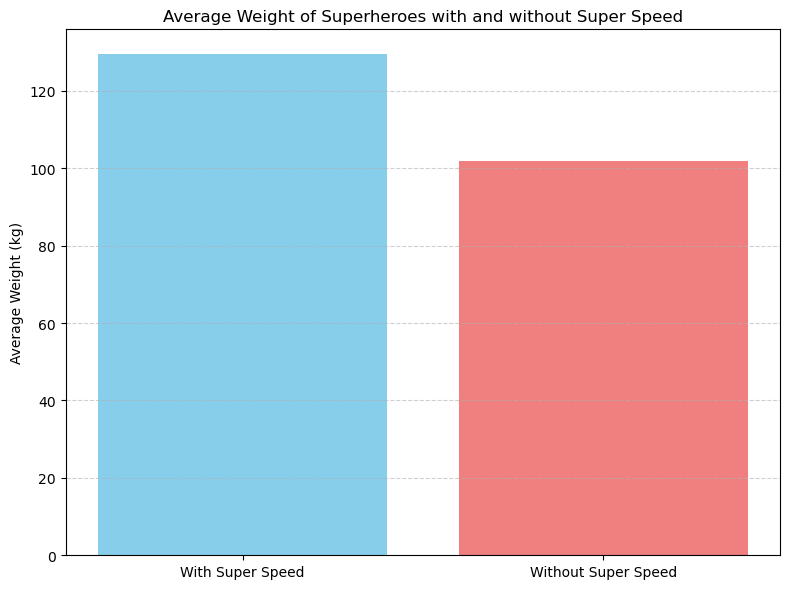

In [22]:
# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(['With Super Speed', 'Without Super Speed'], [avg_weight_w_spd, avg_weight_no_spd], color=['skyblue', 'lightcoral'])
plt.title('Average Weight of Superheroes with and without Super Speed')
plt.ylabel('Average Weight (kg)')

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### What is the average height of heroes for each publisher?

In [19]:
avg_height_by_publisher = combined_df.groupby('Publisher')['Height'].mean().sort_values(ascending=False)

print(f'Average Height of Heroes for each publisher: {avg_height_by_publisher}')

Average Height of Heroes for each publisher: Publisher
Image Comics         211.000000
Marvel Comics        191.546128
DC Comics            181.923913
Star Trek            181.500000
Team Epic TV         180.750000
Unknown              178.000000
Dark Horse Comics    176.909091
Shueisha             171.500000
George Lucas         159.600000
Name: Height, dtype: float64


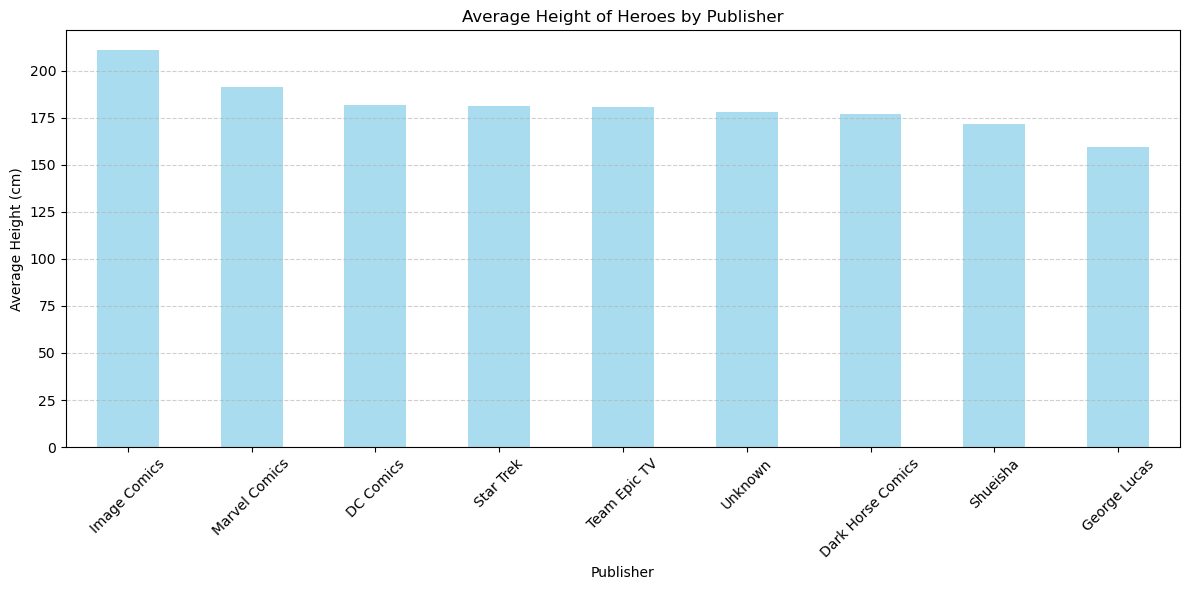

In [20]:
# Creatinga bar plot
plt.figure(figsize=(12, 6))  # Set the figure size
avg_height_by_publisher.plot(kind='bar', color='skyblue', alpha=0.7)  # Create a bar plot

# Customize the plot
plt.title('Average Height of Heroes by Publisher')
plt.xlabel('Publisher')
plt.ylabel('Average Height (cm)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()